## Perform Exploratory Data Analysis - Bivariate
- Examine each independent (predictor) feature in relation to the dependent (response) feature
- Form initial hypotheses regarding their level of correlation to the outcome

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the cleaned source file into a DataFrame.
data_dir = os.path.join(os.getcwd(), 'Data')
source_file = os.path.join(data_dir, 'WA-Telco-Customer-Churn-EDA.csv')
df = pd.read_csv(source_file, header=0, index_col=0)

In [3]:
# Make appropriate data type assignments.
def set_datatypes(dframe):
    for col in dframe.columns:
        if dframe[col].dtypes.str.startswith('int'):
            dframe[col] = pd.to_numeric(dframe[col],
                                        downcast='integer',
                                        errors='coerce')
            
        elif dframe[col].dtypes.str.startswith('float'):
            dframe[col] = pd.to_numeric(dframe[col],
                                        downcast='float',
                                        errors='coerce')
            
        elif dframe[col].dtypes == 'object':
            dframe[col] = dframe[col].astype('category')
        
    return dframe

df = set_datatypes(df)

# Validate new data type assignments.
df.dtypes

Customerid          category
Gender              category
SeniorCitizen       category
Partner             category
Dependents          category
Tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [4]:
# Get Descriptive statistics regarding all numeric features.
df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Create Box-and-Whisker Plots

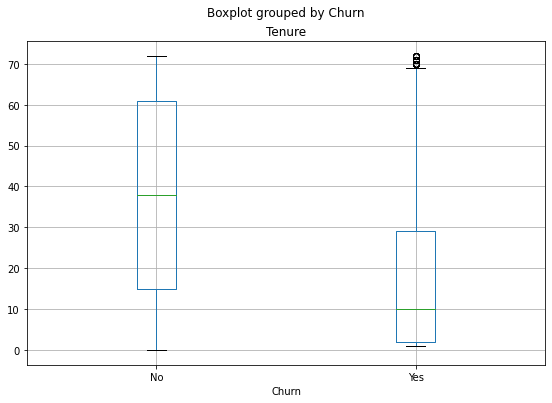

In [5]:
df.boxplot(column="Tenure", by="Churn", figsize= (9,6))

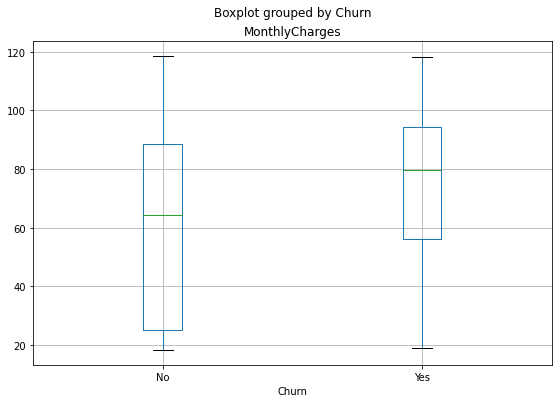

In [6]:
df.boxplot(column="MonthlyCharges", by="Churn", figsize= (9,6))

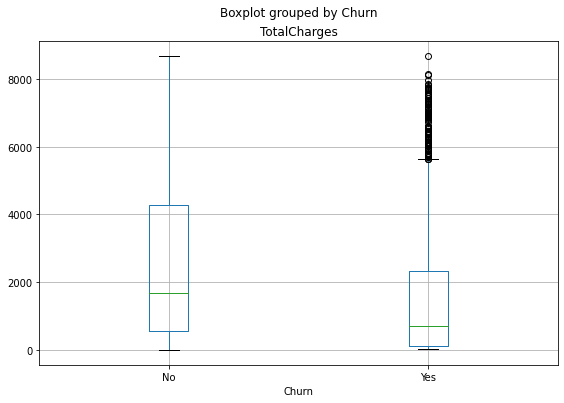

In [7]:
df.boxplot(column="TotalCharges", by="Churn", figsize= (9,6))

### Create Frequency Tables and Stacked Bar Charts

In [8]:
churn_gender_df = pd.crosstab(index=df["Churn"], columns=df["Gender"])
churn_gender_df

Gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


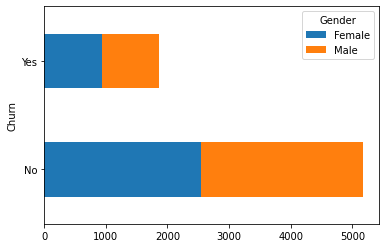

In [9]:
churn_gender_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [10]:
churn_senior_df = pd.crosstab(index=df["Churn"], columns=df["SeniorCitizen"])
churn_senior_df

SeniorCitizen,No,Yes
Churn,,
No,4508,666
Yes,1393,476


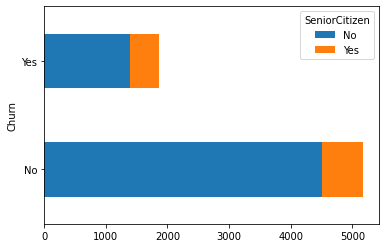

In [11]:
churn_senior_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [12]:
churn_partner_df = pd.crosstab(index=df["Churn"], columns=df['Partner'])
churn_partner_df

Partner,No,Yes
Churn,,
No,2441,2733
Yes,1200,669


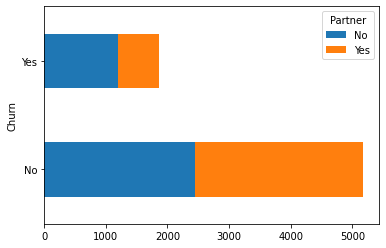

In [13]:
churn_partner_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [14]:
churn_dependents_df = pd.crosstab(index=df["Churn"], columns=df["Dependents"])
churn_dependents_df

Dependents,No,Yes
Churn,,
No,3390,1784
Yes,1543,326


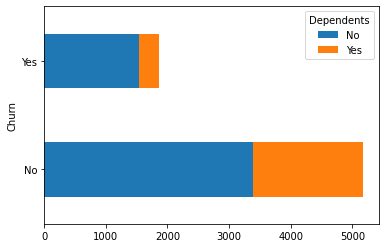

In [15]:
churn_dependents_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [16]:
churn_phonesvc_df = pd.crosstab(index=df["Churn"], columns=df["PhoneService"])
churn_phonesvc_df

PhoneService,No,Yes
Churn,,
No,512,4662
Yes,170,1699


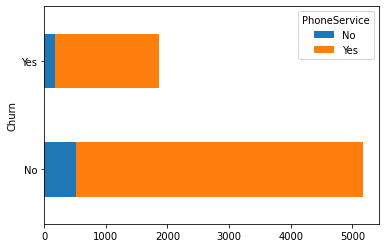

In [17]:
churn_phonesvc_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [18]:
churn_multilines_df = pd.crosstab(index=df["Churn"], columns=df["MultipleLines"])
churn_multilines_df

MultipleLines,No,No phone service,Yes
Churn,,,
No,2541,512,2121
Yes,849,170,850


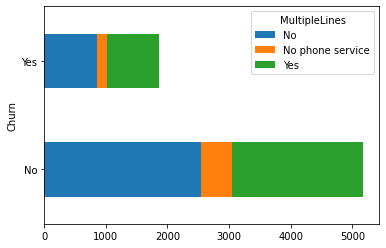

In [19]:
churn_multilines_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [20]:
churn_intservice_df = pd.crosstab(index=df["Churn"], columns=df["InternetService"])
churn_intservice_df

InternetService,DSL,Fiber optic,No
Churn,,,
No,1962,1799,1413
Yes,459,1297,113


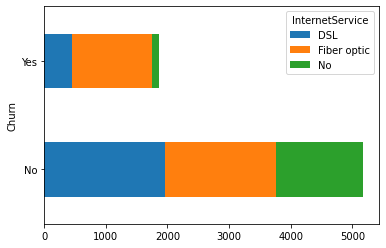

In [21]:
churn_intservice_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [22]:
churn_onlinesec_df = pd.crosstab(index=df["Churn"], columns=df["OnlineSecurity"])
churn_onlinesec_df

OnlineSecurity,No,No internet service,Yes
Churn,,,
No,2037,1413,1724
Yes,1461,113,295


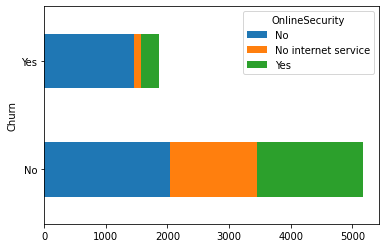

In [23]:
churn_onlinesec_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [24]:
churn_olbackup_df = pd.crosstab(index=df["Churn"], columns=df["OnlineBackup"])
churn_olbackup_df

OnlineBackup,No,No internet service,Yes
Churn,,,
No,1855,1413,1906
Yes,1233,113,523


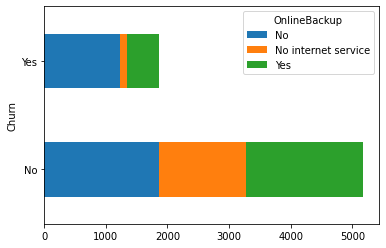

In [25]:
churn_olbackup_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [26]:
churn_devprotect_df = pd.crosstab(index=df["Churn"], columns=df["DeviceProtection"])
churn_devprotect_df

DeviceProtection,No,No internet service,Yes
Churn,,,
No,1884,1413,1877
Yes,1211,113,545


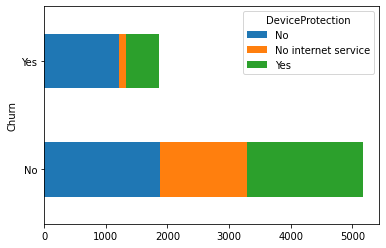

In [27]:
churn_devprotect_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [28]:
churn_tekspt_df = pd.crosstab(index=df["Churn"], columns=df["TechSupport"])
churn_tekspt_df

TechSupport,No,No internet service,Yes
Churn,,,
No,2027,1413,1734
Yes,1446,113,310


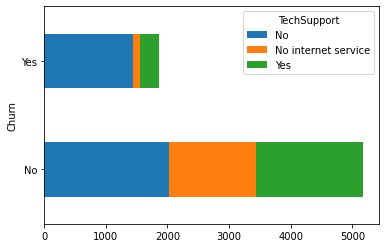

In [29]:
churn_tekspt_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [30]:
churn_tv_df = pd.crosstab(index=df["Churn"], columns=df["StreamingTV"])
churn_tv_df

StreamingTV,No,No internet service,Yes
Churn,,,
No,1868,1413,1893
Yes,942,113,814


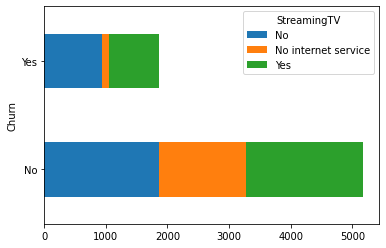

In [31]:
churn_tv_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [32]:
churn_movies_df = pd.crosstab(index=df["Churn"], columns=df["StreamingMovies"])
churn_movies_df

StreamingMovies,No,No internet service,Yes
Churn,,,
No,1847,1413,1914
Yes,938,113,818


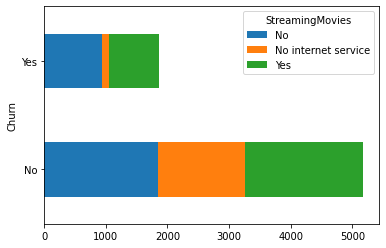

In [33]:
churn_movies_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [34]:
churn_contract_df = pd.crosstab(index=df["Churn"], columns=df["Contract"])
churn_contract_df

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


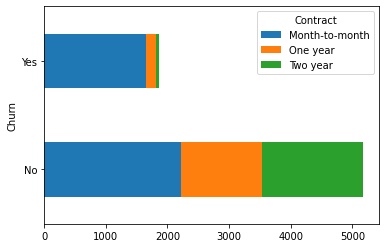

In [35]:
churn_contract_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [36]:
churn_billing_df = pd.crosstab(index=df["Churn"], columns=df["PaperlessBilling"])
churn_billing_df

PaperlessBilling,No,Yes
Churn,,
No,2403,2771
Yes,469,1400


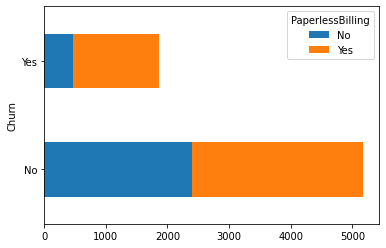

In [37]:
churn_billing_df.plot(kind="barh", figsize=(6,4), stacked=True)

In [38]:
churn_paymeth_df = pd.crosstab(index=df["Churn"], columns=df["PaymentMethod"])
churn_paymeth_df  #/churn_paymeth_df.sum()

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


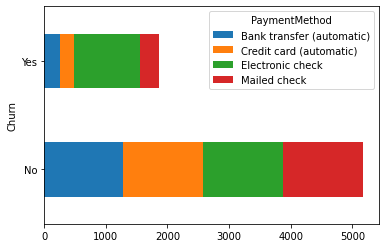

In [39]:
churn_paymeth_df.plot(kind="barh", figsize=(6,4), stacked=True)